# Boot Camp

Perguntas para a análise:<br>
	1.	Análise de vendas:<br>
	•	Qual é o valor total de vendas por país?<br>
	•	Qual é o vendedor com o maior valor total de vendas?<br>
	•	Qual é o tipo de venda mais lucrativo (Física ou Online)?<br>
	2.	Desempenho de produtos:<br>
	•	Quais produtos têm a maior margem de lucro (Valor de Vendas - Valor de Custo)?<br>
	•	Qual marca gera o maior volume de vendas?<br>
	3.	Forma de pagamento:<br>
	•	Qual forma de pagamento é mais utilizada para vendas online?<br>
	•	Existe alguma relação entre o tipo de venda e a forma de pagamento escolhida?<br>
	4.	Localização geográfica:<br>
	•	Qual cidade apresenta o maior volume de vendas?<br>
	•	Existe alguma correlação entre países e tipos de venda?<br>

In [24]:
# Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [25]:
df = pd.read_excel('Downloads/loja_online_dados_corrigidos.xlsx')

In [26]:
# Criar coluna de margem de lucro.
df['Margem de Lucro'] = df['Valor de Vendas'] - df['Valor de Custo']
df

,Código do Produto,Produto,Marca,Modelo,País,Valor de Custo,Valor de Vendas,Vendedor,Tipo de Venda,Forma de Pagamento,Cidade,Margem de Lucro
0,PROD-1,Smartwatch,NextGen,ProMax,Alemanha,495.62,521.08,Lucas,Online,Crédito,Berlim,25.46
1,PROD-2,Notebook,TechCorp,Ultra,Canadá,384.95,129.93,Ana,Online,Débito,Ottawa,-255.02
2,PROD-3,Notebook,FutureWare,Lite,Austrália,382.81,316.96,Mariana,Física,Crédito,Sydney,-65.85
3,PROD-4,Smartwatch,NextGen,Sapphire,Austrália,161.43,239.11,Mariana,Online,Dinheiro,Brisbane,77.68
4,PROD-5,Celular,Innovate,Ultra,Alemanha,425.09,897.80,Carlos,Física,Pix,Colônia,472.71
...,...,...,...,...,...,...,...,...,...,...,...,...
995,PROD-996,Fone de Ouvido,Innovate,Sapphire,Austrália,376.97,578.14,Carlos,Física,Débito,Sydney,201.17
996,PROD-997,Fone de Ouvido,FutureWare,Lite,Estados Unidos,365.67,845.75,Lucas,Online,Pix,Los Angeles,480.08
997,PROD-998,Notebook,Innovate,Sapphire,Estados Unidos,372.37,482.96,Ana,Online,Crédito,Los Angeles,110.59
998,PROD-999,Fone de Ouvido,NextGen,X1,Estados Unidos,254.48,155.61,Mariana,Física,Pix,Los Angeles,-98.87


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Código do Produto   1000 non-null   object 
 1   Produto             1000 non-null   object 
 2   Marca               1000 non-null   object 
 3   Modelo              1000 non-null   object 
 4   País                1000 non-null   object 
 5   Valor de Custo      1000 non-null   float64
 6   Valor de Vendas     1000 non-null   float64
 7   Vendedor            1000 non-null   object 
 8   Tipo de Venda       1000 non-null   object 
 9   Forma de Pagamento  1000 non-null   object 
 10  Cidade              1000 non-null   object 
 11  Margem de Lucro     1000 non-null   float64
dtypes: float64(3), object(9)
memory usage: 93.9+ KB


### 1. Analise de vendas

In [28]:
# Qual o valor total de vendas por pais.
pais = df.groupby ('País')['Valor de Vendas'].sum().sort_values(ascending = False)
pais

País
Brasil            115128.33
Alemanha          114943.71
Estados Unidos    112038.73
Austrália         107702.81
Canadá             98834.66
Name: Valor de Vendas, dtype: float64

In [29]:
# Qual é o vendedor com o maior valor total de vendas?
vendedor = df.groupby ("Vendedor") ["Valor de Vendas"].sum().sort_values(ascending = False)
vendedor

Vendedor
Ana        127635.23
Mariana    113934.06
Lucas      109115.65
João       101051.96
Carlos      96911.34
Name: Valor de Vendas, dtype: float64

In [30]:
# Qual é o tipo de venda mais lucrativo (Física ou Online)?
tipo_vendas = df.groupby ('Tipo de Venda') ["Valor de Vendas"].sum().sort_values(ascending = False)
tipo_vendas

Tipo de Venda
Física    284414.65
Online    264233.59
Name: Valor de Vendas, dtype: float64

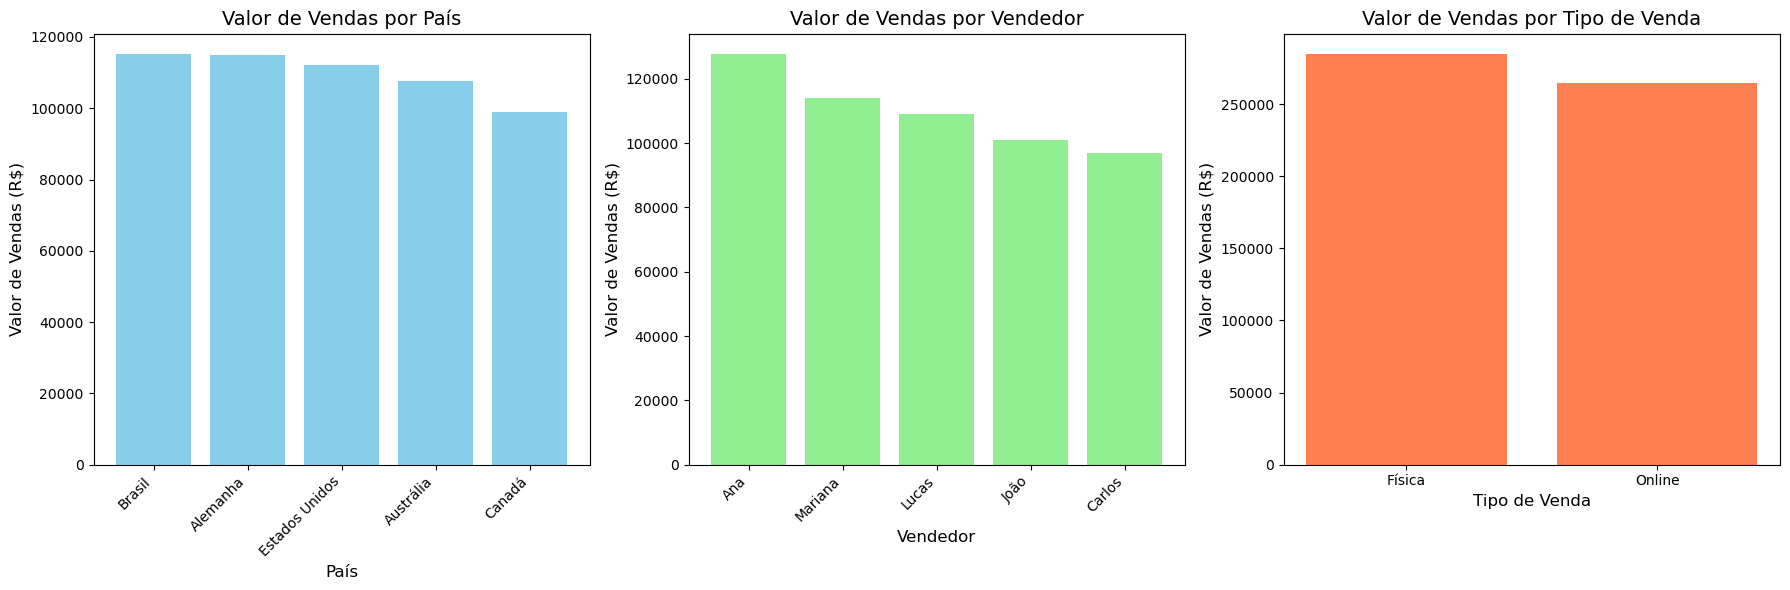

In [57]:
# Configurar a figura e subplots
plt.figure(figsize=(18, 6))

# Gráfico 1: Valor de Vendas por País
plt.subplot(1, 3, 1)
plt.bar(pais.index, pais.values, color='skyblue')
plt.title('Valor de Vendas por País', fontsize=14)
plt.xlabel('País', fontsize=12)
plt.ylabel('Valor de Vendas (R$)', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Gráfico 2: Valor de Vendas por Vendedor
plt.subplot(1, 3, 2)
plt.bar(vendedor.index, vendedor.values, color='lightgreen')
plt.title('Valor de Vendas por Vendedor', fontsize=14)
plt.xlabel('Vendedor', fontsize=12)
plt.ylabel('Valor de Vendas (R$)', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Gráfico 3: Valor de Vendas por Tipo de Venda
plt.subplot(1, 3, 3)
plt.bar(tipo_vendas.index, tipo_vendas.values, color='coral')
plt.title('Valor de Vendas por Tipo de Venda', fontsize=14)
plt.xlabel('Tipo de Venda', fontsize=12)
plt.ylabel('Valor de Vendas (R$)', fontsize=12)
plt.xticks(rotation=0)

# Ajustar espaçamento entre os subplots
plt.tight_layout()

# Exibir os gráficos
plt.show()

### 2. Desempenho de produtos

In [31]:
# Quais produtos têm a maior margem de lucro (Valor de Vendas - Valor de Custo)?
margem_lucro_produto = df.groupby ('Produto') ["Margem de Lucro"].sum().sort_values(ascending = False)
margem_lucro_produto

Produto
Tablet            61404.95
Smartwatch        56612.87
Celular           53060.38
Fone de Ouvido    52310.17
Notebook          48892.54
Name: Margem de Lucro, dtype: float64

In [32]:
# Qual marca gera o maior margem de lucro?
margem_lucro_marca = df.groupby ('Marca') ["Margem de Lucro"].sum().sort_values(ascending = False)
margem_lucro_marca

Marca
FutureWare    62122.57
NextGen       56595.16
Innovate      54956.50
TechCorp      51638.99
GadgetPro     46967.69
Name: Margem de Lucro, dtype: float64

In [33]:
# Qual marca gera o maior volume de vendas?
marca = df["Marca"].value_counts()
marca

Marca
NextGen       221
FutureWare    216
TechCorp      194
Innovate      189
GadgetPro     180
Name: count, dtype: int64

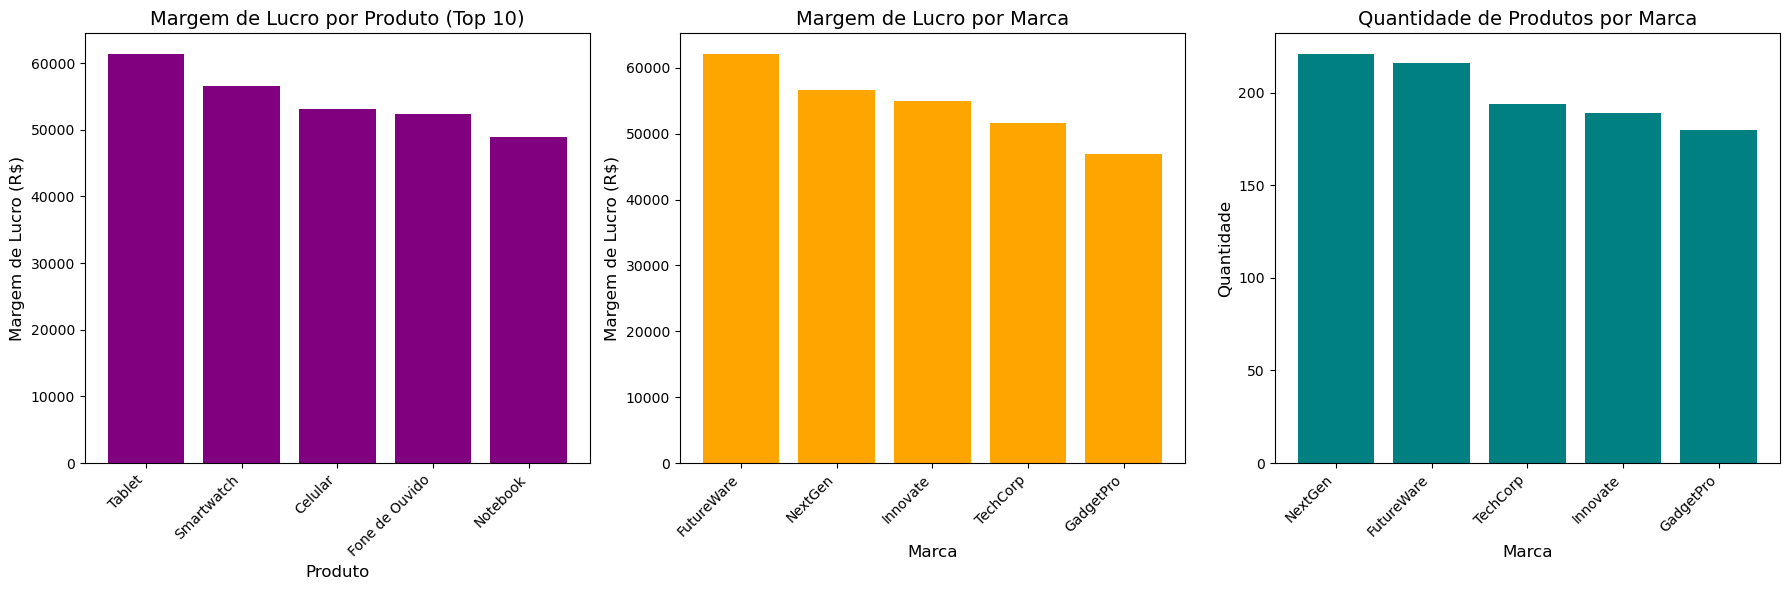

In [58]:
# Configurar a figura e subplots
plt.figure(figsize=(18, 6))

# Gráfico 1: Margem de Lucro por Produto
plt.subplot(1, 3, 1)
plt.bar(margem_lucro_produto.index[:10], margem_lucro_produto.values[:10], color='purple')  # Mostra os 10 primeiros produtos
plt.title('Margem de Lucro por Produto (Top 10)', fontsize=14)
plt.xlabel('Produto', fontsize=12)
plt.ylabel('Margem de Lucro (R$)', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Gráfico 2: Margem de Lucro por Marca
plt.subplot(1, 3, 2)
plt.bar(margem_lucro_marca.index, margem_lucro_marca.values, color='orange')
plt.title('Margem de Lucro por Marca', fontsize=14)
plt.xlabel('Marca', fontsize=12)
plt.ylabel('Margem de Lucro (R$)', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Gráfico 3: Contagem de Produtos por Marca
plt.subplot(1, 3, 3)
plt.bar(marca.index, marca.values, color='teal')
plt.title('Quantidade de Produtos por Marca', fontsize=14)
plt.xlabel('Marca', fontsize=12)
plt.ylabel('Quantidade', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Ajustar espaçamento entre os subplots
plt.tight_layout()

# Exibir os gráficos
plt.show()

### 3. Forma de pagamento

In [34]:
# Qual forma de pagamento é mais utilizada para vendas online?
vendas_online = df[df["Tipo de Venda"] == "Online"]
formas_pagamento_online = vendas_online["Forma de Pagamento"].value_counts()
formas_pagamento_online

Forma de Pagamento
Crédito     145
Débito      144
Pix         144
Dinheiro     58
Name: count, dtype: int64

In [36]:
# Existe alguma relação entre o tipo de venda e a forma de pagamento escolhida?
relacao_vendas_pagamento = pd.crosstab(df["Tipo de Venda"], df["Forma de Pagamento"])
relacao_vendas_pagamento

Forma de Pagamento,Crédito,Dinheiro,Débito,Pix
Tipo de Venda,,,,
Física,142,66,150,151
Online,145,58,144,144


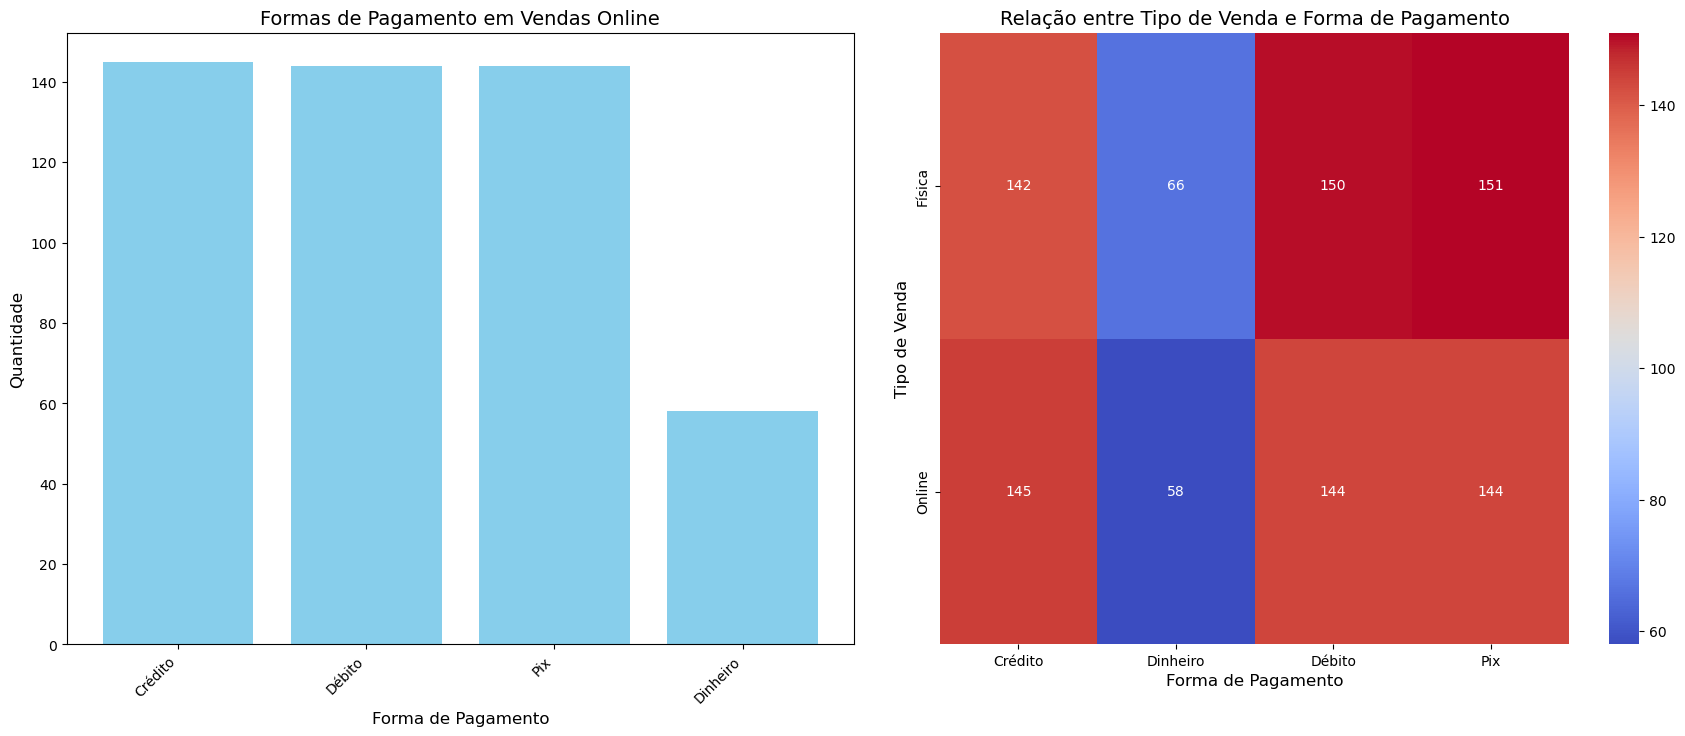

In [68]:
# Configurar a figura e subplots
plt.figure(figsize=(18, 8))  # Aumentei a altura da figura

# Gráfico 1: Contagem de Formas de Pagamento em Vendas Online
plt.subplot(1, 2, 1)
plt.bar(formas_pagamento_online.index, formas_pagamento_online.values, color='skyblue')
plt.title('Formas de Pagamento em Vendas Online', fontsize=14)
plt.xlabel('Forma de Pagamento', fontsize=12)
plt.ylabel('Quantidade', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Gráfico 2: Correlação entre Tipo de Venda e Forma de Pagamento
plt.subplot(1, 2, 2)
sns.heatmap(
    relacao_vendas_pagamento, 
    annot=True, 
    fmt="d", 
    cmap="coolwarm", 
    cbar=True
)
plt.title('Relação entre Tipo de Venda e Forma de Pagamento', fontsize=14)
plt.xlabel('Forma de Pagamento', fontsize=12)
plt.ylabel('Tipo de Venda', fontsize=12)

# Ajustar espaçamento entre os subplots
plt.tight_layout(pad=3)  # Adicionei espaçamento entre os gráficos

# Exibir os gráficos
plt.show()

### 4. Localização geográfica

In [41]:
# Qual cidade apresenta o maior volume de vendas?
cidade_vendas = df["Cidade"].value_counts()
cidade_vendas

Cidade
Berlim            62
Rio de Janeiro    52
São Paulo         52
Los Angeles       51
Toronto           51
Chicago           45
Perth             45
Frankfurt         42
Brisbane          42
Houston           41
Salvador          39
Melbourne         38
Vancouver         36
Nova York         36
Miami             35
Hamburgo          35
Curitiba          35
Adelaide          35
Munique           35
Ottawa            35
Colônia           35
Montreal          32
Brasília          31
Sydney            31
Calgary           29
Name: count, dtype: int64

In [44]:
# Existe alguma correlação entre países e tipos de venda?
relacao_pais_tvendas = pd.crosstab(df["País"], df["Tipo de Venda"])
relacao_pais_tvendas

Tipo de Venda,Física,Online
País,,
Alemanha,103,106
Austrália,101,90
Brasil,116,93
Canadá,91,92
Estados Unidos,98,110


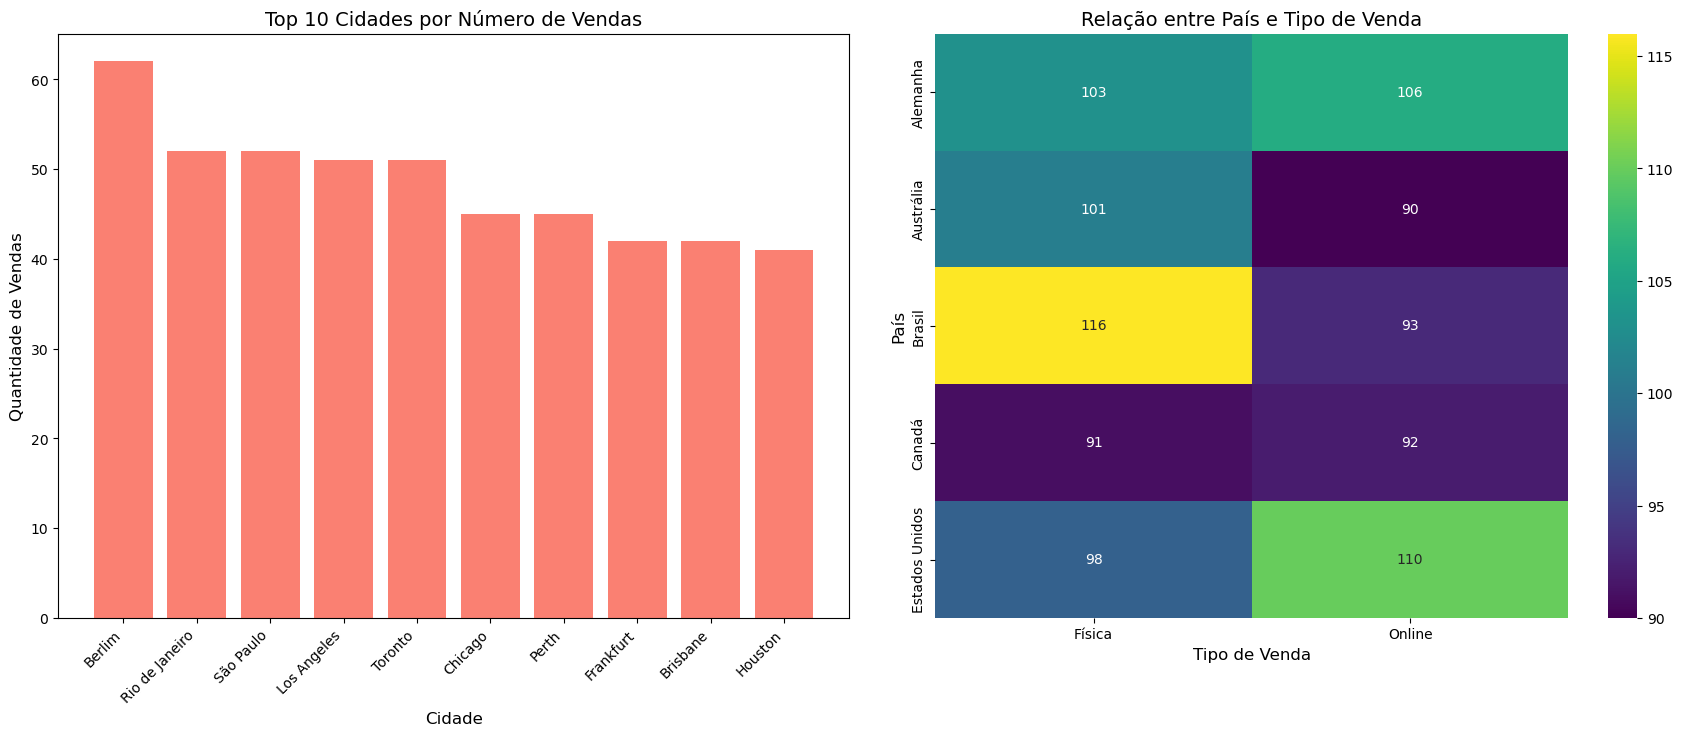

In [69]:
# Configurar a figura e subplots
plt.figure(figsize=(18, 8))  # Aumenta o tamanho da figura

# Gráfico 1: Contagem de Vendas por Cidade
plt.subplot(1, 2, 1)
plt.bar(cidade_vendas.index[:10], cidade_vendas.values[:10], color='salmon')  # Mostra as 10 cidades mais populares
plt.title('Top 10 Cidades por Número de Vendas', fontsize=14)
plt.xlabel('Cidade', fontsize=12)
plt.ylabel('Quantidade de Vendas', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Gráfico 2: Relação entre País e Tipo de Venda
plt.subplot(1, 2, 2)
sns.heatmap(
    relacao_pais_tvendas, 
    annot=True, 
    fmt="d", 
    cmap="viridis", 
    cbar=True
)
plt.title('Relação entre País e Tipo de Venda', fontsize=14)
plt.xlabel('Tipo de Venda', fontsize=12)
plt.ylabel('País', fontsize=12)

# Ajustar espaçamento entre os subplots
plt.tight_layout(pad=3)  # Adiciona espaçamento entre os gráficos

# Exibir os gráficos
plt.show()